In [2]:
import numpy as np

x = np.array([1, 2, 3])
x.__class__
x.shape

(3,)

In [3]:
x.shape

(3,)

In [4]:
x.ndim

1

In [5]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [6]:
W.ndim

2

----------------------------------------------------------------------------------------------------------------

In [7]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [8]:
import numpy as np
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1
print(x)
print(h)

[[-0.4690884   1.09988214]
 [-1.52151443  1.09321535]
 [ 1.68180604  1.21059445]
 [-0.16183416  0.67069314]
 [ 0.2986892   0.69767279]
 [-0.5811257   0.89694044]
 [-0.49270032  0.22119204]
 [-0.56117538  0.65770099]
 [-0.03551438 -0.46648239]
 [ 1.18503374 -0.12738924]]
[[ 1.78057775 -1.43980585  1.99016123 -1.38685519]
 [ 2.64411038 -2.76937953 -0.06652468 -0.30599591]
 [ 0.14146074  1.36860896  6.43365355 -3.6958831 ]
 [ 0.97015482 -1.45618824  1.52420283 -1.2582373 ]
 [ 0.62344848 -0.8518113   2.48369073 -1.75599261]
 [ 1.61061785 -1.77110863  1.2709974  -1.06344339]
 [ 0.6622508  -2.29400125 -0.22903467 -0.45749719]
 [ 1.28427201 -1.97050994  0.71791829 -0.83732829]
 [-0.60715941 -2.36440586 -1.04369943 -0.21558098]
 [-1.17952941 -0.51150852  2.16115205 -1.81048643]]


## sigmoid 함수  
<p align="center"><img src="sigmoid_image.jpeg" width=350 />  

$$ \sigma (x) = \frac{1}{1+exp(-x)}$$  


In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
a = sigmoid(h)
print(a)    

[[0.85576819 0.19157541 0.87976019 0.19991028]
 [0.93364706 0.05900145 0.48337496 0.42409239]
 [0.53530633 0.79715532 0.99839601 0.02422414]
 [0.72515036 0.18905102 0.82115654 0.22127748]
 [0.65100244 0.29905303 0.92299054 0.14729295]
 [0.83349715 0.14540451 0.78091344 0.25665197]
 [0.65976582 0.09162099 0.44299033 0.38757973]
 [0.78317609 0.12233412 0.67214845 0.30209778]
 [0.35270745 0.08592751 0.26043682 0.44631252]
 [0.23513682 0.37483996 0.89670631 0.14057935]]


In [11]:
import numpy as np

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = Sigmoid(h)
s = np.matmul(a, W2) + b2

print(s)

[[-1.49750051  0.88795087 -1.00813379]
 [-1.30425548  0.99674008 -0.85770211]
 [-1.1693169   1.05645954 -0.57177439]
 [-1.58784395  0.83361097 -1.0945554 ]
 [-2.768046    0.2640984  -1.90314971]
 [-1.69549346  0.8859113  -0.76160661]
 [-1.89618127  0.63233641 -1.4620989 ]
 [-1.8083185   0.6396019  -1.6230688 ]
 [-2.71885216  0.28297747 -1.80759462]
 [-2.55554829  0.34319221 -1.8714754 ]]


## 1.2.2 계층으로 클래스화 및 순전파 구현

---

#### 계층의 '구현 규칙'
- 모든 계층은 `forward()`와 `backward()` 메서드를 가진다.
- 모든 계층은 인스턴스 변수인 `params`와 `grads`를 가진다.

`forward()` : 순전파 수행  
`backward()` : 역전파 수행  
`params` : 가중치와 편향 같은 매개변수를 담는 리스트  
`grads` : `params`에 저장된 각 매개변수에 대응하여, 해당 매개변수의 기울기를 저장하는 리스트

---

**Sigmoid layer 구현**

In [12]:
# sigmoid layer

class Sigmoid:
    def __init__(self):
        self.params = [] # 학습하는 매개변수가 따로 없기 때문에 빈 리스트로 초기화
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

**Affine layer 구현**

In [13]:
# Affine layer

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out


#### TwoLayerNet 구현

<p align="center"><img src="TwoLayerNet.jpeg" width=500 />

In [14]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
            
        return x

In [15]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
model.predict(x)

array([[-1.25516403,  0.11523844, -1.20742799],
       [-1.01143878, -0.15483104, -1.3372348 ],
       [-0.9966396 ,  0.10376957, -1.24416151],
       [-1.25657666,  0.05881998, -1.23889305],
       [-1.01678522, -0.09323142, -1.35283278],
       [-1.40799986,  0.10362231, -1.19120638],
       [-1.23248739,  0.0968448 , -1.21588303],
       [-0.89752402, -0.04951407, -1.26569798],
       [-1.24734671,  0.09017979, -1.25966359],
       [-1.11280144, -0.05446938, -1.2846566 ]])

## 1.3 신경망의 학습

#### Repeat node

In [16]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

In [17]:
dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)
print(dx)

[[-2.06669628 -2.85666171 -0.91289341 -3.93797395  3.29932501 -0.21054967
   1.36892167 -0.02486712]]


## 1.4 신경망으로 문제를 풀다
### 1.4.1 스파이럴 데이터셋

In [18]:
import sys
sys.path.append('..')
from dataset import spiral

In [19]:
import matplotlib.pyplot as plt
x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


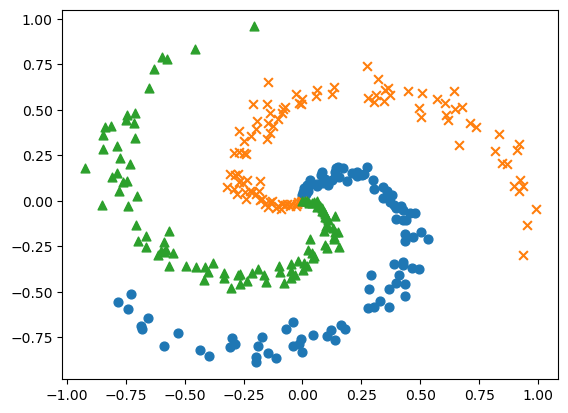

In [20]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
    
plt.show()

### 1.4.2 신경망 구현

In [21]:
import sys
import numpy as np
sys.path.append('..')
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [22]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1.4.3 학습용 코드

In [23]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

In [27]:
# (1) 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# (2) 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # (3) 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # (4) 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # (5) 정기적으로 학습 경과 출력
        if (iter+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print("| 에폭 %d |  반복 %d / %d | 손실 %.2f"
                  %(epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'int'